In [5]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [9]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, precision_score, recall_score

Load the Dataset

In [11]:
df = pd.read_csv('Student Loans Defaulter data.csv')
df

,credit_score,income_monthly,debt_to_income,loan_amount,payment_history,employment_years,previous_defaults,default_risk
0,674.835708,7099.033155,0.384975,22865.63907,0.867133,5.972370,0,0
1,643.086785,6386.950524,0.146207,11070.66754,0.942419,1.101256,1,0
2,682.384427,5089.445555,0.344174,18201.85164,0.701328,0.899285,0,0
3,726.151493,4029.594833,0.177699,21505.53670,0.696824,6.478361,1,0
4,638.292331,6047.334970,0.665765,20919.17258,0.622291,6.014041,2,1
...,...,...,...,...,...,...,...,...
995,635.944985,6605.225357,0.339852,17937.93091,0.820024,-0.013143,0,0
996,739.884326,4960.218111,0.705261,21285.99485,0.877072,5.594924,0,0
997,682.042143,3677.188023,0.208448,18796.67413,0.952854,5.278996,1,0
998,621.441050,4755.399554,0.157916,20039.40092,0.869977,4.430326,1,1


Correlation matrix

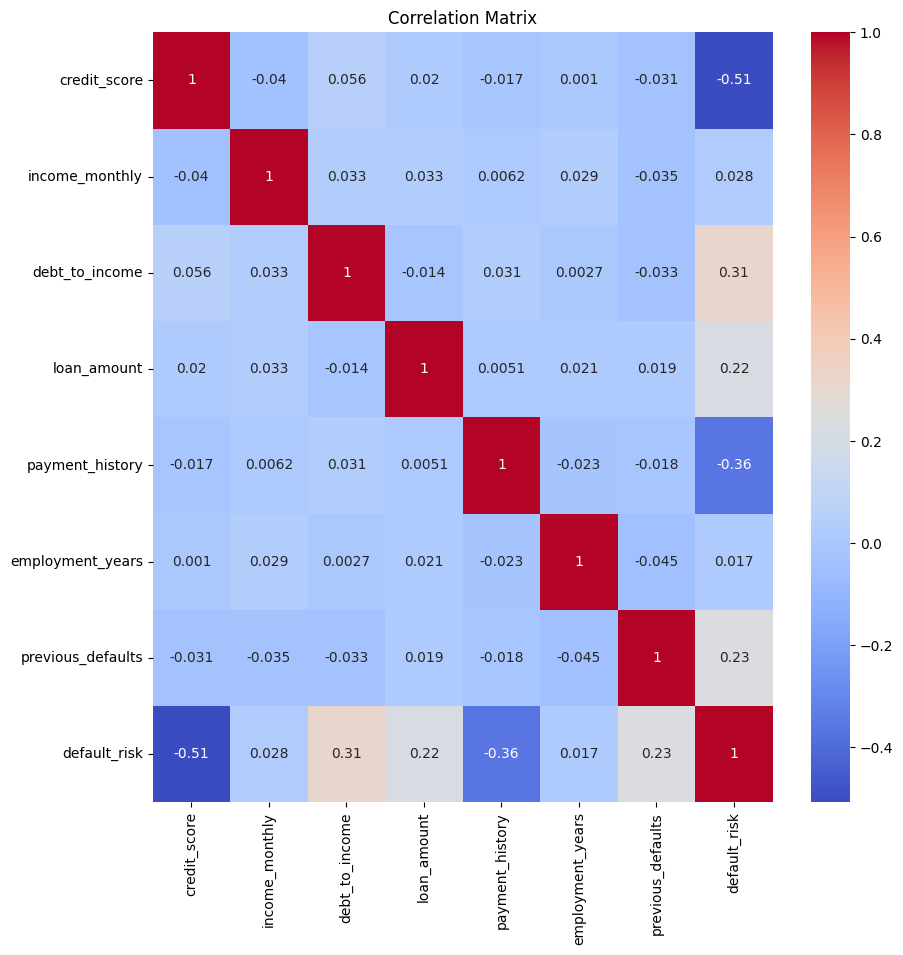

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Preprocessing

In [14]:
df = df.dropna()   #Remove rows with missing values
features = ['credit_score', 'income_monthly', 'debt_to_income',
            'loan_amount', 'payment_history', 'employment_years',
            'previous_defaults']
X = df[features]
y = df['default_risk']

Class balance visualization

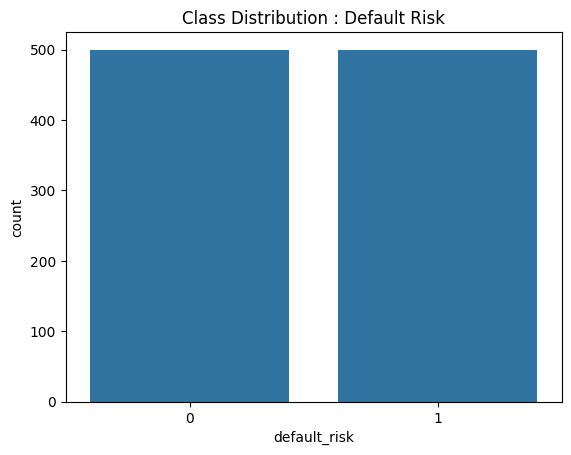

In [15]:
sns.countplot(x=y,data=df)
plt.title('Class Distribution : Default Risk')
plt.show()

Scaling Features

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Model Training

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0,random_state=42)
catboost_classifier.fit(X_train, y_train)

Save models using joblib

In [20]:
joblib.dump(gnb_classifier, 'gnb_model.pkl')
joblib.dump(catboost_classifier, 'catboost_model.pkl')

['catboost_model.pkl']

Model Evaluation


Model Performance Metrics:

Gaussian NB Results:
Accuracy: 0.8900
Precision: 0.8654
Recall: 0.9184
F1 Score: 0.8911
Confusion Matrix:
[[88 14]
 [ 8 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       102
           1       0.87      0.92      0.89        98

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



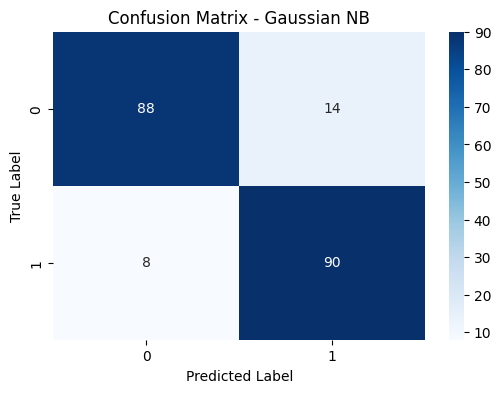


CatBoost Results:
Accuracy: 0.9350
Precision: 0.9474
Recall: 0.9184
F1 Score: 0.9326
Confusion Matrix:
[[97  5]
 [ 8 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       102
           1       0.95      0.92      0.93        98

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



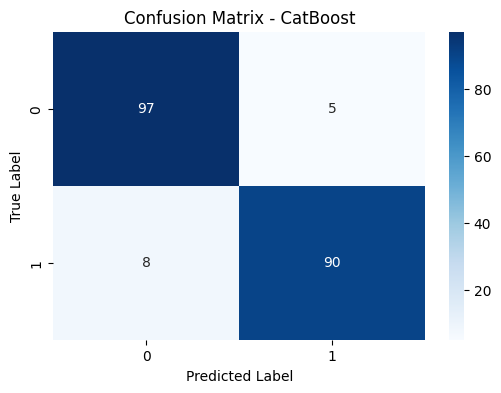

In [21]:
models = {
    'Gaussian NB': gnb_classifier,
    'CatBoost': catboost_classifier
}
print("\nModel Performance Metrics:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

Model Predictions on Test Data (First 5 samples)

In [24]:
for name, model in models.items():
    predictions = model.predict(X_test[:5])
    pred = model.predict_proba(X_test[:5])
    print(f"\n{name} Predictions:")
    print(f"Actual:    {y_test[:5].values}")
    print(f"Predicted: {predictions}")
    print(f"Probabilty Predicted: \n{pred}")


Gaussian NB Predictions:
Actual:    [0 0 1 1 1]
Predicted: [0 0 1 1 1]
Probabilty Predicted: 
[[0.82446588 0.17553412]
 [0.91884891 0.08115109]
 [0.02260672 0.97739328]
 [0.07323069 0.92676931]
 [0.0035262  0.9964738 ]]

CatBoost Predictions:
Actual:    [0 0 1 1 1]
Predicted: [0 0 1 1 1]
Probabilty Predicted: 
[[0.97245249 0.02754751]
 [0.94216263 0.05783737]
 [0.01356326 0.98643674]
 [0.00859604 0.99140396]
 [0.01322623 0.98677377]]
